### Part 1 : Introduction and Data Sections
##### Introduction
The point of this venture is to assist stakeholders, who are curious about opening a Mexican Restaurant in Toronto, Canada, to discover the ideal area to set up the Restaurant. There are a few components to be considered to open a eatery such as: Customers, Staffing, Competition, Menu etc. One of the foremost imperative components is finding the most excellent Area to open a Mexican Eatery. We ought to consider places aren't swarmed with eateries. Uncommonly we are searching for a put with no Mexican Eateries in vicinity. So we gonna utilize information science to examination the Information of Toronto City. Too, we are going utilize the Foursquare API to investigate the neighborhoods. Preferences of each range will at that point be clearly communicated so that best conceivable last area can be chosen by partners.
##### Data
In this extend we'll get our information from Wikipedia website. Here is the connect "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M". We are going discover in this connect a table comprising of three columns (Postal Codes, Boroughs, Neighborhoods), this table is our information that we gonna utilize to analyze Toronto City. But what almost Foursquare API?. How we gonna investigate the neighborhoods without Geological arranges for each neighborhood?. Here is the connect to download the scope and longitude for each postal code https://cocl.us/Geospatial_data After getting the information we require, these information require planning (Information Wrangling) to urge freed of any unuseful data. Since after scratching the information from the site and changing over it into pandas DataFrame, we'll discover a part of lost information (Not Relegated) for certain neighborhoods, due to need of record keeping.



In [13]:
%%capture cap --no-stderr

with open('output.txt', 'w') as f:
    f.write(cap.stdout)

In [12]:
conda install -c conda-forge geopy


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np #array oriented computing
import pandas as pd #data manipulation and analysis
import urllib.request #open URL
import json #to generate and parse JSON-format data
import pip #install and manage software packages written in Python
import requests #make a request to a web page
import folium #interactive leaflet map
from pandas.io.json import json_normalize #normalize semi-structured JSON data into a flat table
import matplotlib.cm as cm #builtin colormaps
import matplotlib.colors as colors #plots a list of the named colors supported in matplotlib
%matplotlib inline 
import matplotlib as mpl #customizing the properties and default styles of matplotlib
import matplotlib.pyplot as plt #collection of command style functions that make matplotlib work like MATLAB
from sklearn.cluster import KMeans #K-means clustering algorithm
from geopy.geocoders import Nominatim #to geolocate a query to an address and coordinates
from sklearn.preprocessing import StandardScaler #normalization

We'll utilize a list of postal codes of Canada in Toronto City, we'll discover within the taking after interface a table with three columns: Postal Codes, Borough , Neighborhood

In [16]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

In [17]:
if int(pip.__version__.split('.')[0])>9:
        from pip._internal import main
else:
        from pip import main
def install(package):
        main(['install', package])

install('BeautifulSoup4')
install ('html5lib')
install ('geopy')


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.



Let's scrape the table we found in wikipedia web page using bs4

In [18]:
from bs4 import BeautifulSoup
Soup = BeautifulSoup(page, "html5lib")
all_tables=Soup.find_all("table")
right_table=Soup.find('table', class_='wikitable sortable')

I'm gonna make 3 lists to store the information from the table and make a dataframe

In [19]:
A=[]
B=[]
C=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

df=pd.DataFrame(A,columns=['PostalCode'])
df['Borough'] = B
df['Neighborhood'] = C

Drop 'Not assigned' in the columns in our dataframe, so we will remove these values and make some adjustments

In [20]:
df.drop(df[df.Borough == 'Not assigned\n'].index, inplace=True)
df = df.replace('\n','', regex=True)
df = df.reset_index(drop = True)

df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


Gain data from map of Toronto
http://map.toronto.ca/wellbeing/#eyJ0b3Itd2lkZ2V0LWNsYXNzYnJlYWsiOsSAcGVyY2VudE9wYWNpdHnElzcwfSwiY3VzxIJtYcSTYcSXxIBuZWlnaGJvdXJob29kc8S2fcSrxIHEg8SFxIfEicSLdGFixYXEmCLEo3RpdmVUxZBJZMSXxYnEhMWPYi1pbmRpY2HEgnLFhcWIYWdzTWFwxLYiesWCbcSXMTPErHjEly04ODM3NzYzLjXGhDcyN8SsxKc6NTQxMjkzMS4yNMaDMjg1xYjFpMWmxajFqsWSxIDFmMWraW9uxJcyxKxzxaRnbGXFtMSucsSTxJ9UaW1lxZzEqMSsxZbGucajIjfFtMafxafFqcSDxZxzQcWlV8S5xLt0xZJbxIDEh8WeNzMixKx3x41odMW5xKzEk8alc2VQb8SOcsSlxo5mYWzHocSrx5LFnToiOTnHlyLHmcS6x5vHnSLHn8Sbx6HHo8elx6fEl8epx6tlfV3Fh8WIxr5lx6HHpsiKxYbErMazxrV0ScWlx4XFqk3Fg8axx7DGrW7Gr8axxYc%3D

In [28]:
data_path = '/Users/jerielmadamba/Desktop/Toronto Neighborhood.csv'
Toronto_Pop = pd.read_csv(data_path)
Toronto_Pop.drop(['Neighbourhood Id','Combined Indicators'], axis=1, inplace=True)
Toronto_Pop.rename(columns={'Neighbourhood': 'Neighborhood'}, inplace=True)
Toronto_Pop

,Neighborhood,Total Population,Latin American
0,West Humber-Clairville,33312,1300
1,Mount Olive-Silverstone-Jamestown,32954,1085
2,Thistletown-Beaumond Heights,10360,660
3,Rexdale-Kipling,10529,850
4,Elms-Old Rexdale,9456,765
...,...,...,...
135,West Hill,27392,555
136,Woburn,53485,745
137,Eglinton East,22776,400
138,Scarborough Village,16724,280


Of course to explore the neighborhoods, I need the coordinates of each neighborhoods. I've used this link https://cocl.us/Geospatial_data

In [29]:
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


merge the data together to get all I need in one dataframe

In [30]:
Df = pd.merge(df,df_geo,left_on='PostalCode', right_on='Postal Code')
Df

,PostalCode,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M3A,North York,Parkwoods,M3A,43.753259,-79.329656
1,M4A,North York,Victoria Village,M4A,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",M7A,43.662301,-79.389494
...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",M8X,43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",M7Y,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",M8Y,43.636258,-79.498509


In [31]:
df_new=Df.drop(['PostalCode'],axis=1)

df = pd.merge(df_new, Toronto_Pop, on='Neighborhood', how='left')
df

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American
0,North York,Parkwoods,M3A,43.753259,-79.329656,NaN,NaN
1,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0
2,Downtown Toronto,"Regent Park, Harbourfront",M5A,43.654260,-79.360636,NaN,NaN
3,North York,"Lawrence Manor, Lawrence Heights",M6A,43.718518,-79.464763,NaN,NaN
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",M7A,43.662301,-79.389494,NaN,NaN
...,...,...,...,...,...,...,...
98,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",M8X,43.653654,-79.506944,NaN,NaN
99,Downtown Toronto,Church and Wellesley,M4Y,43.665860,-79.383160,NaN,NaN
100,East Toronto,"Business reply mail Processing Centre, South C...",M7Y,43.662744,-79.321558,NaN,NaN
101,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",M8Y,43.636258,-79.498509,NaN,NaN


In [32]:
my_data=df.dropna(how='any', axis=0).reset_index(drop=True)

In [33]:
my_data

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American
0,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0
1,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,14365.0,530.0
2,East Toronto,The Beaches,M4E,43.676357,-79.293031,21567.0,215.0
3,Scarborough,Woburn,M1G,43.770992,-79.216917,53485.0,745.0
4,North York,Hillcrest Village,M2H,43.803762,-79.363452,16934.0,220.0
5,East York,Thorncliffe Park,M4H,43.705369,-79.349372,21108.0,305.0
6,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,16724.0,280.0
7,North York,Bayview Village,M2K,43.786947,-79.385975,21396.0,410.0
8,North York,Humber Summit,M9L,43.756303,-79.565963,12416.0,895.0
9,York,Weston,M9N,43.706876,-79.518188,17992.0,1390.0


In [36]:
# Get the geograpical coordinate of Toronto City

address = 'Toronto, T.O'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.
Let's visualize Toronto City and Neighborhoods using Folium.Map

In [37]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(my_data['Latitude'], my_data['Longitude'], my_data['Borough'], my_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Technique In this venture we are going coordinate our endeavors on recognizing zones of Toronto that have moo eatery thickness, especially those with moo number of Mexican restaurants. In first step we have collected the desired information: area of each Mexican eatery within the neighborhoods where Latin American individuals live in. Second step in our examination will be calculation and investigation of 'mexican eatery density' over distinctive zones of Toronto - we'll center
focus
center
 on zones where Latin American population are in common (and no Mexican eateries in region) and center our consideration on those areas. In third and last step we'll center on most promising ranges and inside those make clusters of areas that meet a few basic requirements built up in discourse with partners: we are going take into thought areas with Tall rate of Latin American individuals and Moo rate of Mexican Eateries. We'll display outline of all such areas.
 To Use Foursquare API, I've to use my Client ID & Client Secret

In [38]:
CLIENT_ID = 'UJNHFKRFI52SVTYNFP03IHTF2NBEM2YLKUPFC1WIWHLYSSQU' 
CLIENT_SECRET = '1LXA0EE5KLMVDNRLH2AMM5UC1QUNX2BYBX00KRNVMV45DMRO' 
VERSION = '20180605'

In [39]:
LIMIT = 100 
radius = 1000 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=UJNHFKRFI52SVTYNFP03IHTF2NBEM2YLKUPFC1WIWHLYSSQU&client_secret=1LXA0EE5KLMVDNRLH2AMM5UC1QUNX2BYBX00KRNVMV45DMRO&v=20180605&ll=43.706876,-79.51818840000001&radius=1000&limit=100'

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
toronto_venues = getNearbyVenues(names=my_data['Neighborhood'],
                                   latitudes=my_data['Latitude'],
                                   longitudes=my_data['Longitude']
                                  )

Victoria Village
Humewood-Cedarvale
The Beaches
Woburn
Hillcrest Village
Thorncliffe Park
Scarborough Village
Bayview Village
Humber Summit
Weston


In [44]:
# Now we know that there are 10 Neighborhoods crowd with latin american people who are demanding to eat and enjoy the mexican cuisines

toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview Village,14,14,14,14,14,14
Hillcrest Village,19,19,19,19,19,19
Humber Summit,10,10,10,10,10,10
Humewood-Cedarvale,29,29,29,29,29,29
Scarborough Village,12,12,12,12,12,12
The Beaches,79,79,79,79,79,79
Thorncliffe Park,52,52,52,52,52,52
Victoria Village,12,12,12,12,12,12
Weston,15,15,15,15,15,15


In [45]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 100 uniques categories.


In [46]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,...,Sushi Restaurant,Tea Room,Thai Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Warehouse Store,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
toronto_group = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_group = toronto_group[['Neighborhood', 'Mexican Restaurant']]
toronto_group.set_index('Neighborhood', inplace=True)
toronto_group

,Mexican Restaurant
Neighborhood,
Bayview Village,0.000000
Hillcrest Village,0.000000
Humber Summit,0.000000
Humewood-Cedarvale,0.034483
Scarborough Village,0.000000
The Beaches,0.012658
Thorncliffe Park,0.000000
Victoria Village,0.000000
Weston,0.000000


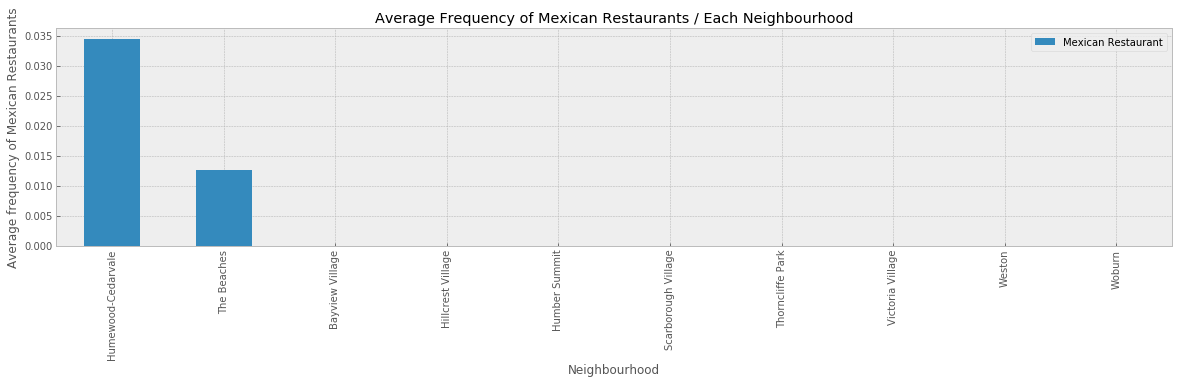

In [48]:
#visualise the percentage of Mexican Restaurants in each Neighborhoods

toronto_group.sort_values(by='Mexican Restaurant', ascending=False, inplace=True)
mpl.style.use('bmh')
toronto_group.plot(kind='bar', figsize=(20,4))
plt.title('Average Frequency of Mexican Restaurants / Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average frequency of Mexican Restaurants')
plt.show()

In [50]:
ultimo = pd.merge(my_data, toronto_group, on='Neighborhood')
ultimo

,Borough,Neighborhood,Postal Code,Latitude,Longitude,Total Population,Latin American,Mexican Restaurant
0,North York,Victoria Village,M4A,43.725882,-79.315572,17510.0,430.0,0.000000
1,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,14365.0,530.0,0.034483
2,East Toronto,The Beaches,M4E,43.676357,-79.293031,21567.0,215.0,0.012658
3,Scarborough,Woburn,M1G,43.770992,-79.216917,53485.0,745.0,0.000000
4,North York,Hillcrest Village,M2H,43.803762,-79.363452,16934.0,220.0,0.000000
5,East York,Thorncliffe Park,M4H,43.705369,-79.349372,21108.0,305.0,0.000000
6,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,16724.0,280.0,0.000000
7,North York,Bayview Village,M2K,43.786947,-79.385975,21396.0,410.0,0.000000
8,North York,Humber Summit,M9L,43.756303,-79.565963,12416.0,895.0,0.000000
9,York,Weston,M9N,43.706876,-79.518188,17992.0,1390.0,0.000000


### Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

Conclusion
After all of the analysis above, we will come up with “Cluster Label” 1 is the best option we have. The high population of Latin American people who most probably prefer to enjoy their cuisines such as Mexican food, and the very low number of Mexican restaurants in this neighborhood, will satisfy our goal from this project and the possibility of achieving the expected profits is very high. So, I would suggest to our clients to consider “Weston” neighborhood as the optimal location to establish a new Mexican restaurants, but if our clients are seeking to expand a franchised restaurants, I would recommend “Cluster Label 3” cause it has two neighborhoods with a good percentage of Latin American like “Humber Summit” and “Woburn” neighborhoods.